Code to organize data into train/test split

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shutil

In [3]:
df = pd.read_csv('/Users/nsi/Documents/ant-size/csv/ant_size_dataset.csv')
df['mass_mg'] = df['mass']*1000
df.head()

,id,mass,date,id1,id2,object,camera,filename,mass_mg
0,10,0.001,2019-06-27-11,3A11,3A12,ant,DSLR,2019-06-27-11_3A11_3A12_ant_DSLR_CROPPED_0.001...,1.0
1,10,0.001,2019-06-27-11,3A10,3A38,ant,DSLR,2019-06-27-11_3A10_3A38_ant_DSLR_CROPPED_0.001...,1.0
2,10,0.001,2019-06-27-11,3A11,3A21,ant,DSLR,2019-06-27-11_3A11_3A21_ant_DSLR_CROPPED_0.001...,1.0
3,10,0.001,2019-06-27-11,3A11,3A46,ant,DSLR,2019-06-27-11_3A11_3A46_ant_DSLR_CROPPED_0.001...,1.0
4,10,0.001,2019-06-27-11,3A11,3A29,ant,DSLR,2019-06-27-11_3A11_3A29_ant_DSLR_CROPPED_0.001...,1.0


In [4]:
# find size range
print("Information about dataset")
print("Minimum mass is " + str(min(df.mass_mg)))
print("Maximum mass is " + str(max(df.mass_mg)))
print("Number of ants represented " + str(len(df.id.unique())))
print("Total number of images " + str(len(df)))

Information about dataset
Minimum mass is 0.2
Maximum mass is 25.3
Number of ants represented 158
Total number of images 5094


/var/folders/jt/lslf8gvn015gpvtk775yzz7h0000gn/T/ipykernel_63423/1881589808.py:7: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)


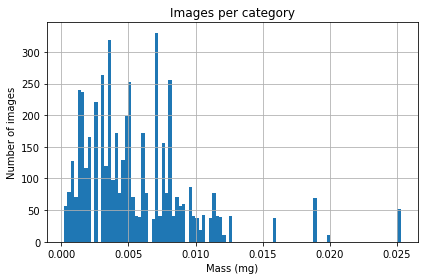

In [5]:
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 100
plt.hist(df['mass'], bins=100)#, bins = range(0, 30, 1))
plt.xlabel('Mass (mg)')
plt.ylabel('Number of images')
plt.title('Images per category')
plt.grid(b=None)
plt.tight_layout()
plt.tick_params(axis='x', which='both', bottom=True, top=False)
plt.tick_params(axis='y', which='both', right=False, left=True)
plt.show()

In [69]:
df['mass_mg'].mean()

5.545229681978836

In [73]:
df['mass_mg'].std()

4.056790045159205

In [59]:
# generate equal sized bins
df['class'] = pd.qcut(
    df['mass_mg'], 
    q=4,
    labels=range(0,4),
    )

In [75]:
pd.qcut(df.mass_mg, 5).value_counts()

(2.0, 3.9]      1087
(0.199, 2.0]    1023
(8.0, 25.3]     1005
(5.8, 8.0]      1000
(3.9, 5.8]       979
Name: mass_mg, dtype: int64

(array([1023.,    0., 1087.,    0.,    0.,  979.,    0., 1000.,    0.,
        1005.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

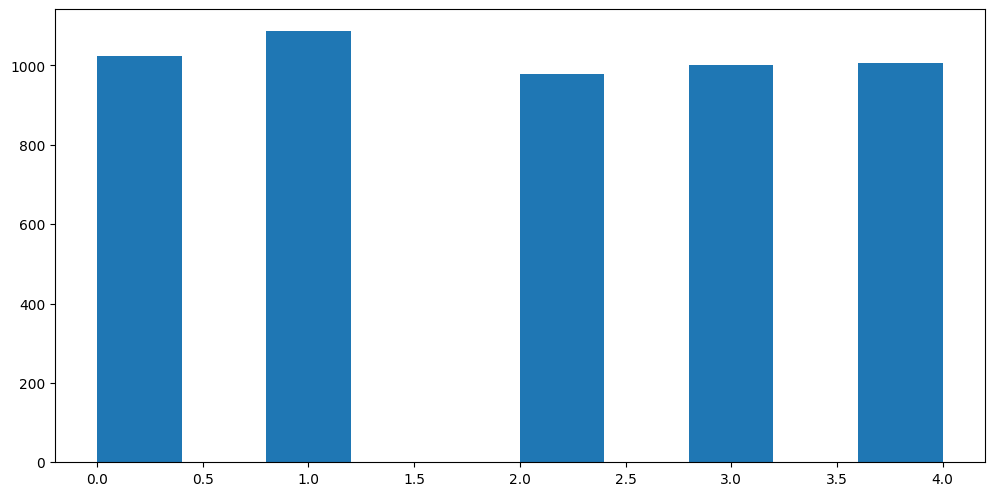

In [46]:
plt.hist(df['binned'])

In [77]:
100/5

20.0

In [14]:
for i in [1.8, 1.9, 2.9, 2.2, 17.3]:
    print(i/25.1)

0.07171314741035856
0.07569721115537847
0.11553784860557768
0.08764940239043825
0.6892430278884462


In [170]:
# organize mass into bins
bins = [0, 2, 5, 10, 15, 60]
df['binned'] = pd.cut(df['mass_mg'], bins)

In [31]:
# rename category naumes
df['cat'] = df['binned'].astype('category')
df['cat'] = df['binned'].cat.rename_categories(range(0, 5))

In [32]:
df.head()

,id,mass,date,id1,id2,object,camera,filename,mass_mg,binned,cat
0,10,0.001,2019-06-27-11,3A11,3A12,ant,DSLR,2019-06-27-11_3A11_3A12_ant_DSLR_CROPPED_0.001...,1.0,"(0.199, 2.0]",0
1,10,0.001,2019-06-27-11,3A10,3A38,ant,DSLR,2019-06-27-11_3A10_3A38_ant_DSLR_CROPPED_0.001...,1.0,"(0.199, 2.0]",0
2,10,0.001,2019-06-27-11,3A11,3A21,ant,DSLR,2019-06-27-11_3A11_3A21_ant_DSLR_CROPPED_0.001...,1.0,"(0.199, 2.0]",0
3,10,0.001,2019-06-27-11,3A11,3A46,ant,DSLR,2019-06-27-11_3A11_3A46_ant_DSLR_CROPPED_0.001...,1.0,"(0.199, 2.0]",0
4,10,0.001,2019-06-27-11,3A11,3A29,ant,DSLR,2019-06-27-11_3A11_3A29_ant_DSLR_CROPPED_0.001...,1.0,"(0.199, 2.0]",0


In [33]:
# check if sorted correctly (should only show one category)
category1 = df['binned'].unique()[0]
df.loc[df.binned == category1]['cat'].unique()

[0]
Categories (5, int64): [0 < 1 < 2 < 3 < 4]

In [51]:
# randomly select 10% across bins for test set
samples = []
for group in df['class'].unique():
    s = df.loc[df['class']== group].sample(frac=0.2).reset_index(drop=True)
    samples.append(s)
    
test = pd.concat(samples, axis=0)

In [35]:
# remove test set from training set
train = df[~df.filename.isin(test.filename)]

In [36]:
print('Test set has ' + str(len(test)) + ' images') 
print('Train set has ' + str(len(train)) + ' images')

Test set has 1019 images
Train set has 4075 images


In [37]:
1019+4075

5094

In [54]:
type(df['class'][0])

int

In [176]:
test_strs = [str(x) for x in test.cat] 
train_strs = [str(x) for x in train.cat]

/var/folders/jt/lslf8gvn015gpvtk775yzz7h0000gn/T/ipykernel_63423/1523518743.py:7: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)


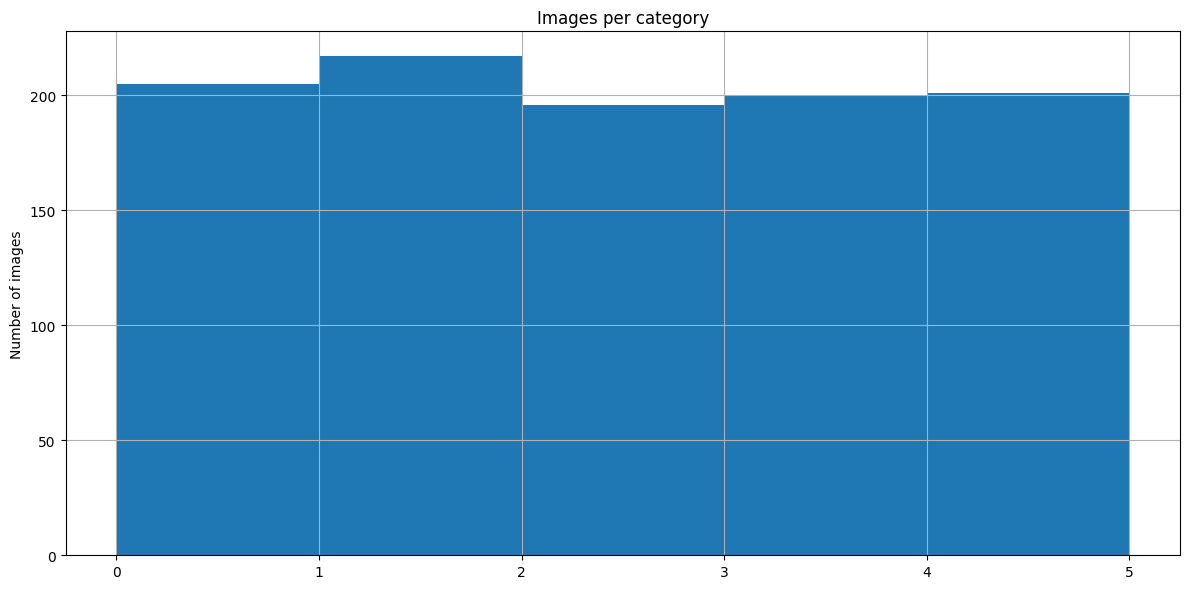

In [52]:
# look at test set distribution
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 100
plt.hist(test['class'], bins=range(0,6))
plt.ylabel('Number of images')
plt.title('Images per category')
plt.grid(b=None)
plt.tight_layout()
#plt.tick_params(axis='x', which='both', bottom=True, top=False)
#plt.tick_params(axis='y', which='both', right=False, left=True)
plt.show()

/var/folders/jt/lslf8gvn015gpvtk775yzz7h0000gn/T/ipykernel_63423/226733618.py:7: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)


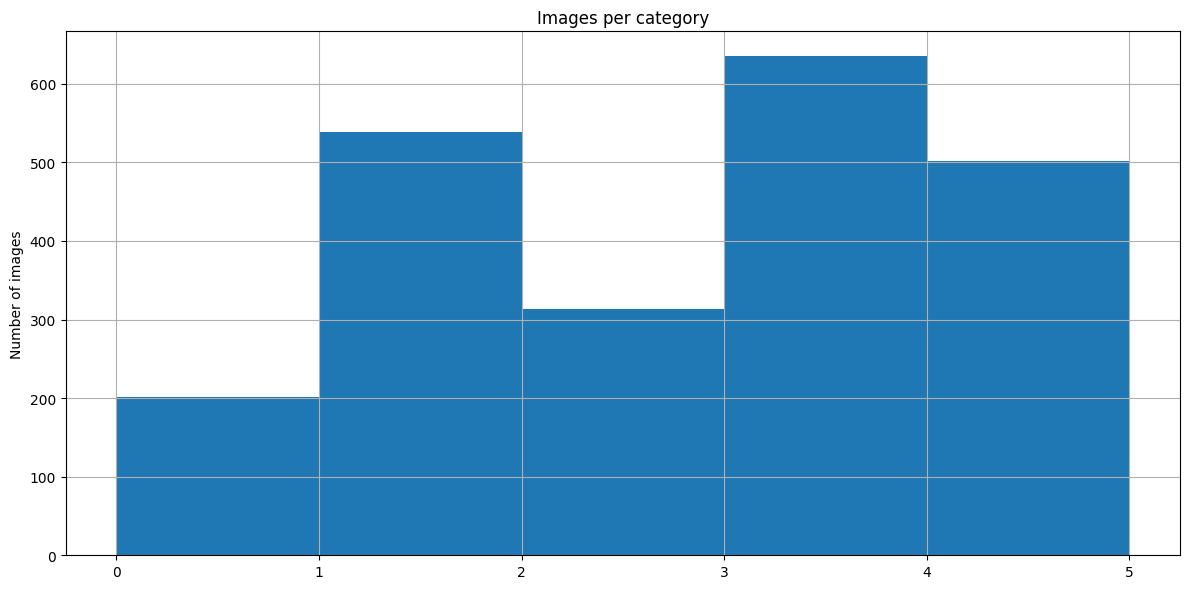

In [41]:
# look at test set distribution
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 100
plt.hist(train['mass_mg'], bins=range(0,6))
plt.ylabel('Number of images')
plt.title('Images per category')
plt.grid(b=None)
plt.tight_layout()
#plt.tick_params(axis='x', which='both', bottom=True, top=False)
#plt.tick_params(axis='y', which='both', right=False, left=True)
plt.show()

In [210]:
test_folder = '/Users/nsi/Documents/ant-size/data/test'
train_folder = '/Users/nsi/Documents/ant-size/data/train'
num_files = 0
for root, dirs, files in os.walk('/Users/nsi/Documents/ant-size/single_animal'):   
    for file in files:
        if file.endswith('.JPG'):
            num_files += 1
            if (test['filename'].eq(file)).any():
                shutil.copy(os.path.join(root, file), test_folder)
            else:
                shutil.copy(os.path.join(root, file), train_folder)

print(num_files)

5094


In [198]:
# 5092 files moved but 5094 in dataframe...
file_list = []
for root, dirs, files in os.walk('/Users/nsi/Documents/ant-size/single_animal'):   
    for file in files:
        if file.endswith('.JPG'):
            file_list.append(file)

In [209]:
print(df[~df['filename'].isin(file_list)].filename)

2365    2019-06-28-18_3A54_3A29_ant_C920_CROPPED_0.005...
2367    2019-06-28-18_3A54_3A37_ant_C920_CROPPED_0.005...
Name: filename, dtype: object


In [202]:
for f in file_list:
    if not df['filename'].isin(file):
        print(file)

TypeError: only list-like objects are allowed to be passed to isin(), you passed a [str]

In [178]:
train.to_csv('../data/train_ant_size.csv', index_label = False)
test.to_csv('../data/test_ant_size.csv', index_label = False)